<a href="https://colab.research.google.com/github/simpapa/PRA3024/blob/main/GW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Set 1

In [ ]:
#Installing pycbc
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

**Challenge 1**

Identify a loud binary black hole signal in white, Gaussian noise.

● Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".

● The data are white, Gaussian noise containing a simulated BBH signal.
1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4. What is the time of the merger?
Data files may be downloaded using this link:
● challenge1.gwf

In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf


--2024-02-19 13:37:48--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge1.gwf [following]
--2024-02-19 13:37:48--  https://gwosc.org/s/workshop3/challenge/challenge1.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.1’

challenge1.gwf.1    100%[===================>]   3.84M  7.06MB/s    in 0.5s    

2024-02-19 13:37:49 (7.06 MB/s) - ‘challenge1.gwf.1’ saved [4025674/4025674]



In [ ]:
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [ ]:
gwpy_strain.sample_rate

<Quantity 4096. Hz>

In [ ]:
gwpy_strain.duration

<Quantity 128. s>

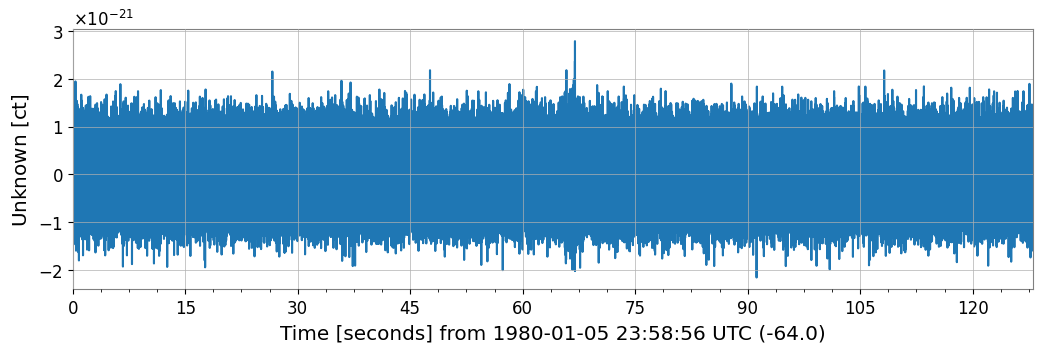

In [ ]:
plot=gwpy_strain.plot()

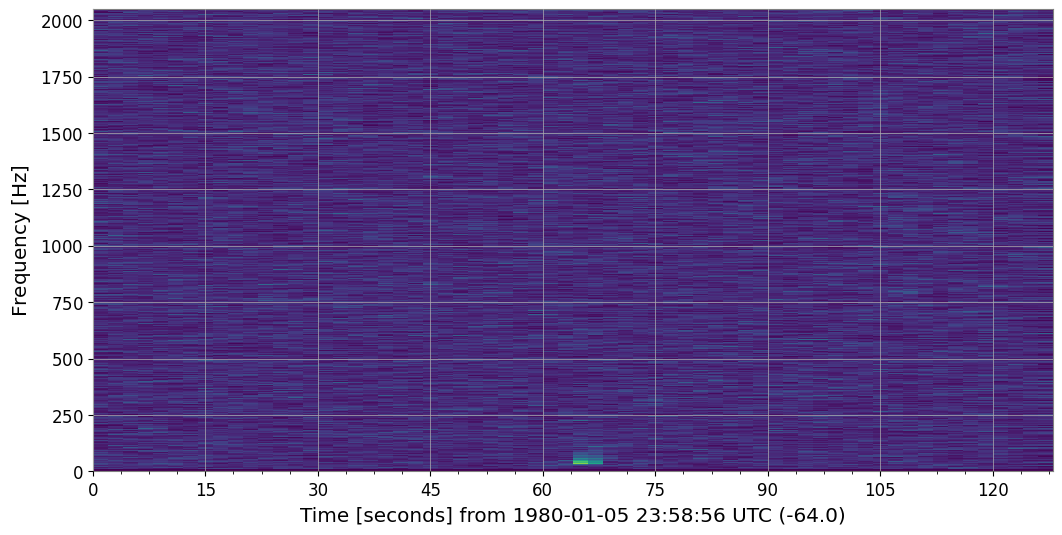

In [ ]:
#Plots spectrogram
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

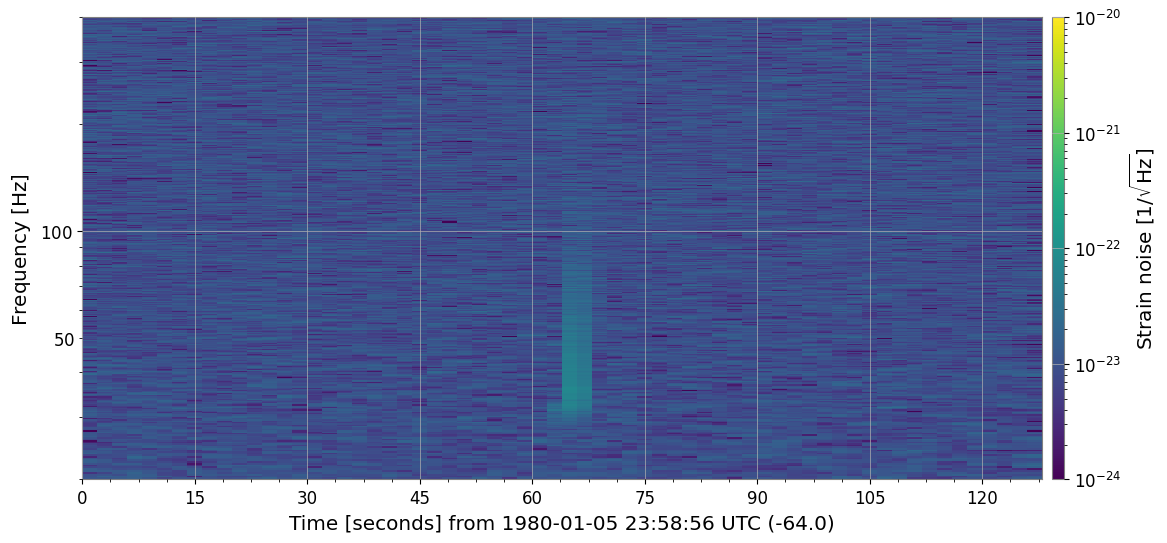

In [ ]:
#Customizing plot
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(20, 400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  #refresh the plot

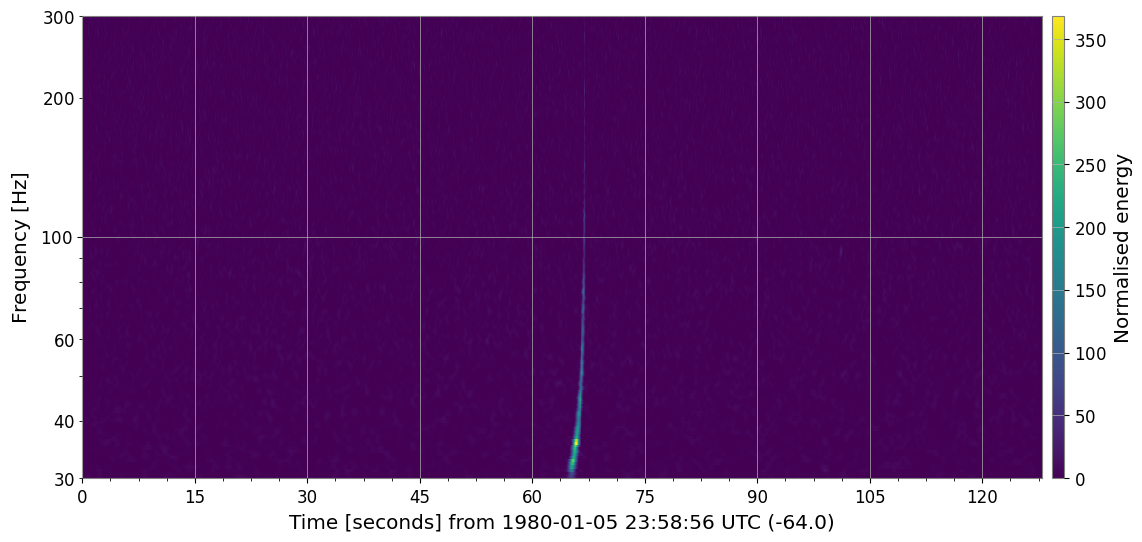

In [ ]:
#Calculate the Q-transform of the gravitational wave strain data
hq = gwpy_strain.q_transform(frange=(30, 300), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

time of merger is -64 +62
-2 seconds

**Challenge 2:**

Signal in colored, Gaussian noise.

● Use the data file "challenge2.gwf", with channel name "H1:CHALLENGE2"

● The data contain a BBH signal with m1=m2=30 solar masses, spin = 0.
1. What is the approximative time of the merger? (Hint: a plot of the q-transform
could help)
2. Generate a time-domain template waveform using approximate
"SEOBNRv4_opt". with the same parameters as above. Plot this waveform.
3. Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging
from 20 Hz up to the Nyquist frequency.
4. Use the template waveform and PSD to calculate the SNR time series. Plot the
SNR time-series.
5. What is the matched filter SNR of the signal?



In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf


--2024-02-19 13:56:03--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-19 13:56:03--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  7.09MB/s    in 0.5s    

2024-02-19 13:56:04 (7.09 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



In [ ]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

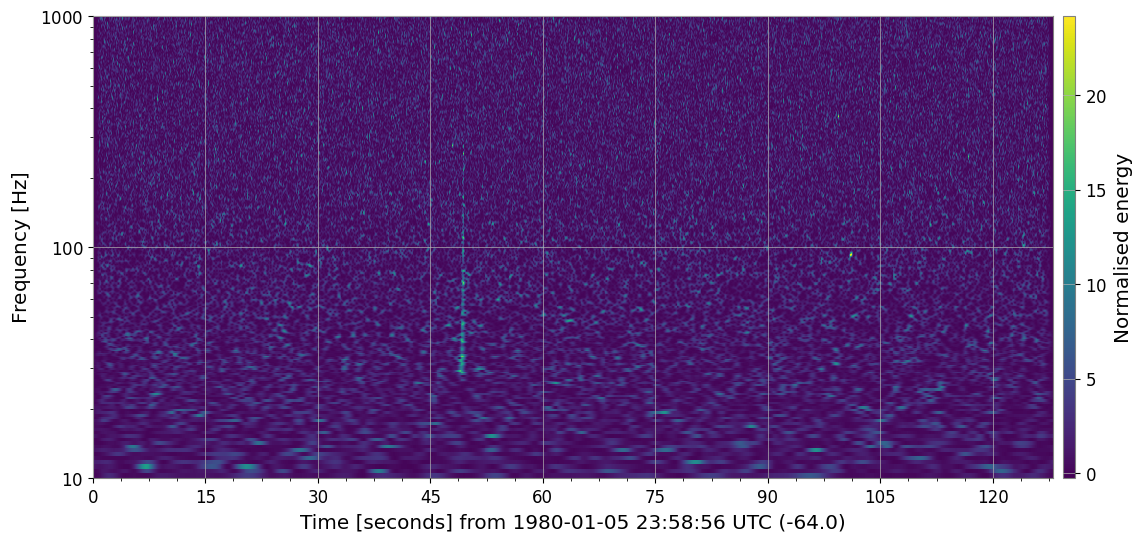

In [ ]:
hq = data.q_transform(frange=(10, 1000), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

In [ ]:
data.plot


<bound method TimeSeriesBase.plot of <TimeSeries([ 8.75332715e-22,  1.27597248e-22,  1.88838802e-22,
             ..., -1.91886478e-23, -2.10989354e-22,
              2.30287965e-22]
            unit=Unit("ct"),
            t0=<Quantity -64. s>,
            dt=<Quantity 0.00024414 s>,
            name='H1:CHALLENGE2',
            channel=None)>>

In [ ]:
! pip install -q pycbc

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

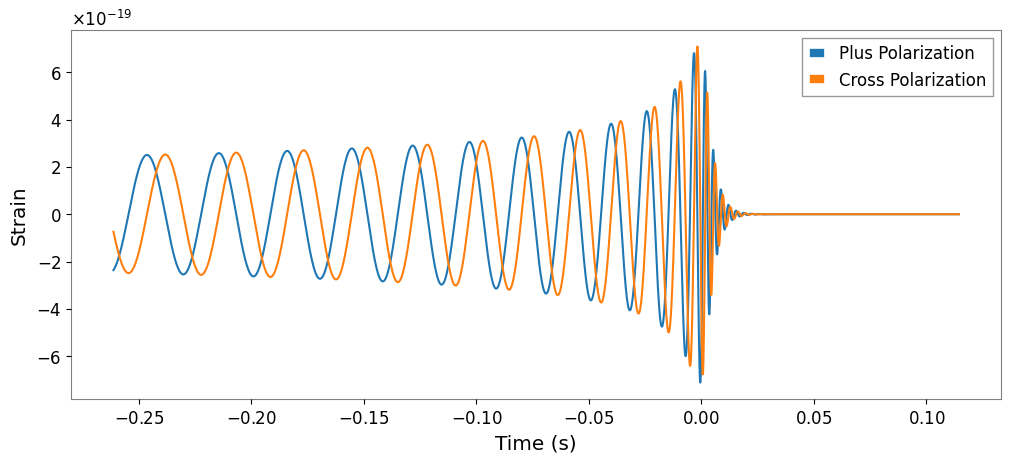

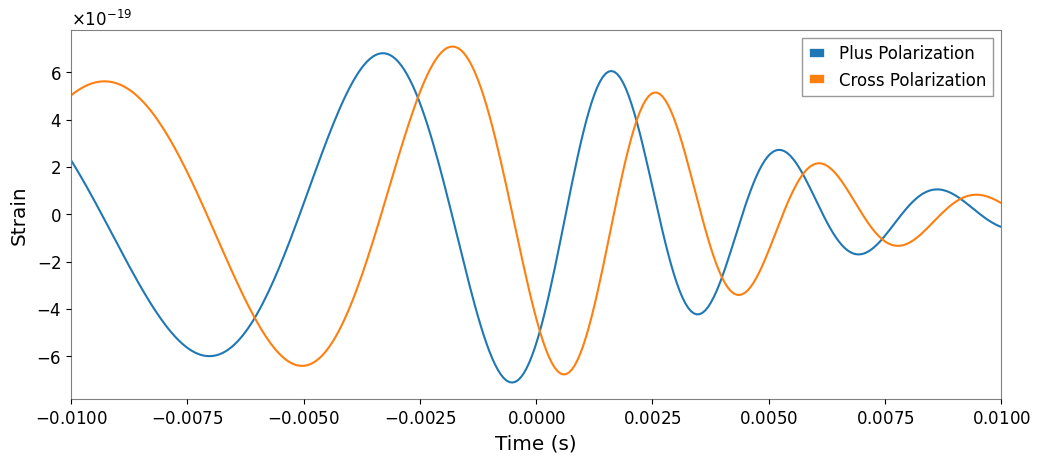

In [ ]:
#This section generates the "plus" and "cross" polarizations of the gravitational wave signal
#The waveform is generated using the SEOBNR_opt approximant with masses of 30 solar masses each, a time step of 1/16384 seconds, and a lower frequency  cutoff of 30Hz

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30)

#Plot the waveforms

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

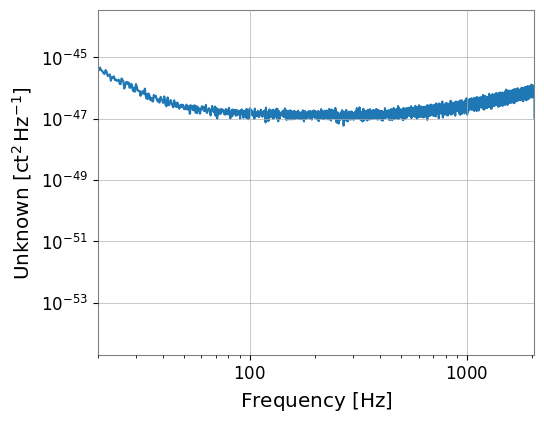

In [ ]:
#Calculate the PSD of the provided data
psd= data.psd(fftlength = 4 , method ="median") #median used for averaging taking the median value of multiple PSD estimates
plot = psd.plot(yscale='log', xscale='log')
ax = plot.gca()
ax.set_xlim(20,2048); #set x-axis limits to visualize frequencies from 20Hz to the nyquist frequency

In [ ]:
!pip install pycbc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements 

In [ ]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2024-02-20 13:15:45--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-20 13:15:45--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  6.74MB/s    in 0.6s    

2024-02-20 13:15:46 (6.74 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



In [ ]:
from pycbc import frame
strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')


In [ ]:
from pycbc.filter import matched_filter
import numpy
import pylab  #Importing pylab for plotting


#Perform matched filtering
#This step computes the SNR of the data using a given template waveform
snr = matched_filter(template, conditioned, psd=psd, low_frequency_cutoff=20)

#This step removes the time corrupted by the template filter and the psd filter
#The argument (4+4,4) specifies the time interval to crop from the begining and the end
snr = snr.crop(4 + 4, 4)

#Plot the absolute value of SNR
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))  # Taking absolute value
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

#Get the index of the maximum absolute SNR value
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))


NameError: name 'template' is not defined

# Assignment set 2

**Challenge 2**



*   Load the data of the LIGO Hanford detector from [2]. Plot the noise power spectral
density (PSD) of that data. Test whether there is any gravitational wave signal present
in the data or not? For this test, you can assume the GW signals can produce only
from equal mass binary systems with a range between 5 to 10. We assume a threshold
on matched filter SNR of 8 to claim detection of GW
*   Whiten the above data using its noise PSD. You can use PyCBC based function of the
Welch method to estimate the PSD. Construct a histogram of the whitened data and
show that the whiten data follows a Gaussian distribution with zero mean.
*   In gravitational wave data analysis, we consider that the noise is stationary Gaussian.
But in reality, the stationary assumption does not hold. Can you think of a test to
show that the stationarity does not hold?
[To devise this test, you can consider the above data (?). Take a arbitrary gravitational
waveform h(f ) and calculate the optimal SNR ρopt,
ρ2
opt = 4
∫ |h(f )|2
Sn(f ) df, (1)
where Sn(f ) is noise power spectral density of the data. For the test, you can consider
different chunk of data





*Part 1 *

In [58]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
from pycbc.types import  FrequencySeries, TimeSeries
from scipy import interpolate
import numpy as np
from pycbc import frame
import pycbc
from pycbc.filter import resample_to_delta_t, highpass
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from pycbc.detector import Detector
from scipy.interpolate import interp1d
from pycbc.filter import highpass
from pycbc import types
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
from pycbc.waveform import get_td_waveform
import pycbc.psd
from pycbc.psd import welch, interpolate
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
from pycbc.types import TimeSeries

In [52]:
import numpy as np
import pycbc.types


file_path = '/noise_ts_4096Hz.npy'


# Reading the second dataset from LIGO Hanford
data2 = np.load(file_path )

# Retrieving the Time and Strain data from the file
Time = data2[:, 0]
Strain = data2[:, 1]

# Converting the data into time series data
DT = Time[1] - Time[0]
Data = pycbc.types.TimeSeries(Strain, delta_t=DT)


Text(0, 0.5, 'strain')

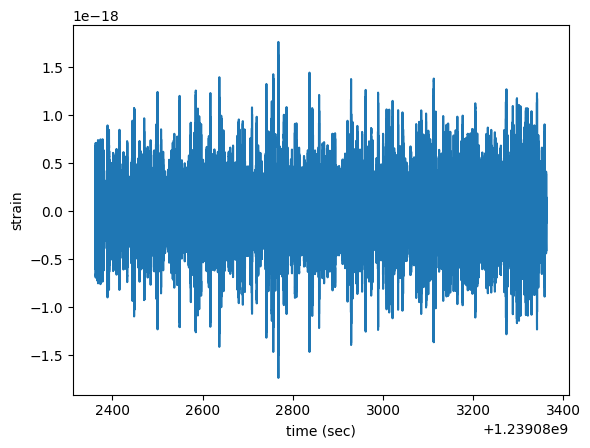

In [55]:
'''
Loading the data and converting the data type into time
series
'''
import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
import matplotlib.pyplot as plt
d = np.load('/noise_ts_4096Hz.npy')
time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]-
time[0])
data = d
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')

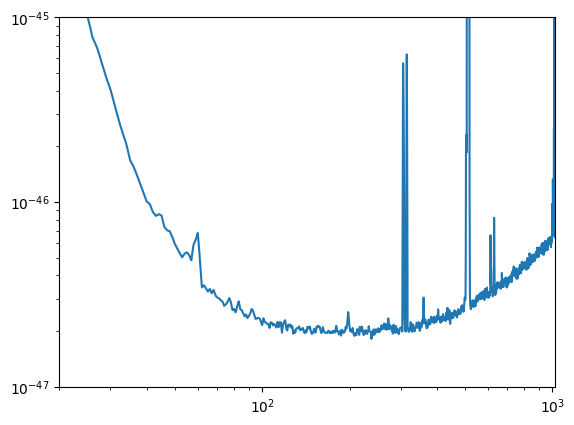

In [72]:
#The following code computes the power spectral density of a signal using the Welch's method
psds = interpolate(welch(d), 1.0 / d.duration)

pylab.loglog(psds.sample_frequencies, psds, psds)
pylab.xlim(20, 1024)
pylab.ylim(1e-47, 1e-45)
pylab.show()

In [73]:
#Performs a gravitational wave analysis for  a range of 5 to 10 solar masses along with a conversion of data in a a frequency series.
#It utilizes the  TaylorF2 waveform  approximation
flow = 20 #lower frequency cutoff
stilde = data.to_frequencyseries()#convert the data to a frequency series
masses = np.arange(5,10,0.5)

#loop through masses
for mass in masses:
  hp, hc = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
                                          mass1 = mass,
                                          mass2 = mass,
                                          f_lower = flow,
                                          delta_f=stilde.delta_f)
  #resize the waveform to match the length of the data
  hp.resize(len(stilde))
  #apply cyclic time shift to the waveform
  template = hp.cyclic_time_shift(hp.start_time)

#calculate the signal to noise ratio using matched filtering
  snr = pycbc.filter.matched_filter(hp, stilde,
                                  psd = psds,
                                  low_frequency_cutoff = flow)
  #extract the central portion of the SNR corresponidng to the template
  snr = snr[len(snr)//4:len(snr) * 3//4]

  #checking if a gravitational wave with a greater SNR than 8 has been detected.
  peak = abs(snr).numpy().argmax()
  snrp = snr[peak]
  print(snrp)
  if(snrp > 8):
    print('The equal masses of {} give an SNR greater that 8 in {}'.format(mass, abs(snrp)) )
  else:
    print('No SNR greater that 8 was detected. The max mass was {}'.format(abs(snrp)))


(-5.085446728405492+0.3632290540649144j)
No SNR greater that 8 was detected. The max mass was 5.098402080374498
(1.2833695084319825-5.061823465982032j)
No SNR greater that 8 was detected. The max mass was 5.221981816890911
(2.5575237968609015+4.3888230308944545j)
No SNR greater that 8 was detected. The max mass was 5.0796353774675
(-4.431884915787419-3.837751043628396j)
No SNR greater that 8 was detected. The max mass was 5.862587908053482
(5.0656653782832395-0.5904621048257571j)
No SNR greater that 8 was detected. The max mass was 5.0999618843647
(-4.943568699606112+0.9917026764475714j)
No SNR greater that 8 was detected. The max mass was 5.042057683743666
(-5.652859838792316+1.3800487440060698j)
No SNR greater that 8 was detected. The max mass was 5.818879522112812
(-5.437084933845886-0.827498082752328j)
No SNR greater that 8 was detected. The max mass was 5.499695051074442
(-5.155796269715773-1.5840987373953965j)
No SNR greater that 8 was detected. The max mass was 5.393663317693529

**Part 2 **

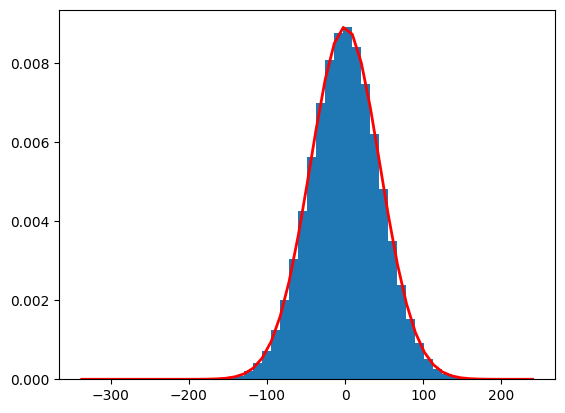

In [75]:
#Plotting steps inspired by ka-grb and and LLBockenhoff

#Whitening the data
#Convert data to frequency series and whiten it using the given `psds`
white_data = (data.to_frequencyseries() / psds ** 0.5).to_timeseries()
white_data = white_data.crop(4, 4)

#Calculate the mean and standard deviation of the whitened data
mu, sigma = np.mean(white_data), np.std(white_data)
#Generate a random distribution with the same mean and standard deviation as the whitened data
s = np.random.normal(mu, sigma, white_data.shape[0])

#Plot a histogram of the whitened data
hist, bins, _ = plt.hist(white_data, bins=50, density=True, label='data')

#Plot the normal distribution on the same graph for comparison
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

plt.show()

**Part 3 **

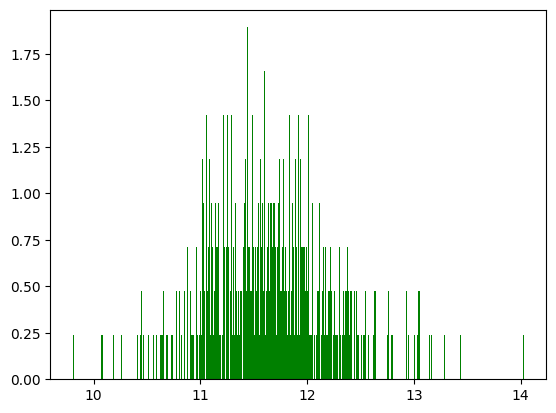

In [77]:
#Similar approach to the previous section but with the implementation of chunks of equally divided time intervals.

from scipy.stats import norm
from pycbc.filter import sigmasq

from pycbc.waveform import get_fd_waveform
hp, hc = get_fd_waveform(approximant="TaylorF2",
                         mass1=3,
                         mass2=3,
                         delta_f=1.0/(200.0) ,
                         distance = 500,  #Luminosity distance = 500 Mpc
                         f_lower=20.0, f_final = 2048.0)

#splitting data by chunks of 500
data_slice = len(data) // 500
SNRlist = []
fract = round(len(data)/500)

#Loop through chuncks of data
for i in range(0, 500):
   chunk = data[i * data_slice: (i+1)*data_slice]
   #Calculate the PSD for the chunk
   psds = pycbc.psd.interpolate(pycbc.psd.welch(chunk), hp.delta_f)
   #Calculate the SNR for the chunk
   SNR = (pycbc.filter.sigmasq(hp, psds))**0.5
   SNRlist.append(SNR)

#Plotting the histogram
plt.hist(SNRlist, bins = 500, color = "green", density=True)
plt.show()